In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load dataset
def load_data(filename):
    df = pd.read_pickle(filename)
    return df

In [3]:
file_path = "/home/surya/Desktop/FA24/ECE143_Python/Final_Project/US_Car_Accident_Data_Analysis/Dataset/clean_data.pkl"
df = load_data(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 29 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Severity           int8          
 1   Start_Time         datetime64[ns]
 2   Start_Lat          float16       
 3   Start_Lng          float16       
 4   Distance(mi)       float16       
 5   State              object        
 6   Temperature(F)     float16       
 7   Wind_Chill(F)      float16       
 8   Humidity(%)        float16       
 9   Pressure(in)       float16       
 10  Visibility(mi)     float16       
 11  Wind_Speed(mph)    float16       
 12  Precipitation(in)  float16       
 13  Weather_Condition  object        
 14  Bump               bool          
 15  Crossing           bool          
 16  Give_Way           bool          
 17  Junction           bool          
 18  No_Exit            bool          
 19  Railway            bool          
 20  Roundabout         bool 

In [5]:
df.nunique()

Severity                   4
Start_Time           5539720
Start_Lat               1021
Start_Lng                917
Distance(mi)            6961
State                     49
Temperature(F)           860
Wind_Chill(F)           1001
Humidity(%)              100
Pressure(in)             759
Visibility(mi)            92
Wind_Speed(mph)          184
Precipitation(in)        299
Weather_Condition        144
Bump                       2
Crossing                   2
Give_Way                   2
Junction                   2
No_Exit                    2
Railway                    2
Roundabout                 2
Station                    2
Stop                       2
Traffic_Calming            2
Traffic_Signal             2
Turning_Loop               1
Freeway                  841
Is_Freeway                 2
Is_Day                     2
dtype: int64

In [6]:
df['Freeway'] = df['Freeway'].replace('I-5N', 'I-05')
df['Freeway'] = df['Freeway'].replace('I-5S', 'I-05')

In [7]:
# df = load_data(file_path, 1000)
# Road feature-related columns
def road_feature_data(df):
    weather_cols = ['Severity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
                    'Railway', 'Roundabout','Station', 'Stop','Traffic_Calming', 'Traffic_Signal','Turning_Loop', 'Is_Day']
    df = df[~df['Is_Freeway']]
    df = df[weather_cols]
    return df

df_road = road_feature_data(df)

In [8]:
bool_columns = df_road.select_dtypes(include=['bool'])
counts = pd.DataFrame({
    'True': bool_columns.sum(),
    'False': (~bool_columns).sum()
})

print(counts)

                    True    False
Bump                2947  4943500
Crossing          792027  4154420
Give_Way           29262  4917185
Junction          268743  4677704
No_Exit            16279  4930168
Railway            51950  4894497
Roundabout           246  4946201
Station           179967  4766480
Stop              199798  4746649
Traffic_Calming     6178  4940269
Traffic_Signal   1015187  3931260
Turning_Loop           0  4946447


In [9]:
grp_road = df_road.groupby(['Severity'])
grp_road.sum()

,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Is_Day
Severity,,,,,,,,,,,,,
1,34,17656,503,2538,372,1012,0,2626,2583,86,24855,0,52117
2,2854,746665,26767,225036,15089,48028,235,171334,189313,5882,946525,0,3394985
3,37,15457,993,29361,499,1541,5,3475,2580,129,25726,0,129416
4,22,12249,999,11808,319,1369,6,2532,5322,81,18081,0,96791


In [10]:
grp_road.sum().sum(axis = 0)

Bump                  2947
Crossing            792027
Give_Way             29262
Junction            268743
No_Exit              16279
Railway              51950
Roundabout             246
Station             179967
Stop                199798
Traffic_Calming       6178
Traffic_Signal     1015187
Turning_Loop             0
Is_Day             3673309
dtype: object

In [11]:
grp_road = df_road.groupby(['Severity'])
grp_road.sum()

,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Is_Day
Severity,,,,,,,,,,,,,
1,34,17656,503,2538,372,1012,0,2626,2583,86,24855,0,52117
2,2854,746665,26767,225036,15089,48028,235,171334,189313,5882,946525,0,3394985
3,37,15457,993,29361,499,1541,5,3475,2580,129,25726,0,129416
4,22,12249,999,11808,319,1369,6,2532,5322,81,18081,0,96791


In [12]:
def freeway_data(df):
    freeway_cols = ['Severity', 'Freeway', 'Is_Freeway', 'State', 'Start_Lat', 'Start_Lng']
    df = df[df['Is_Freeway']]
    df = df[freeway_cols]
    return df

df_freeway = freeway_data(df)

In [13]:
df_freeway.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2781947 entries, 0 to 7728384
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Severity    int8   
 1   Freeway     object 
 2   Is_Freeway  bool   
 3   State       object 
 4   Start_Lat   float16
 5   Start_Lng   float16
dtypes: bool(1), float16(2), int8(1), object(2)
memory usage: 79.6+ MB


In [14]:
grp_freeway = df_freeway.groupby(['Freeway'])
grp_freeway.describe()


/home/surya/Desktop/FA24/ECE143_Python/Final_Project/US_Car_Accident_Data_Analysis/.venv/lib/python3.11/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/home/surya/Desktop/FA24/ECE143_Python/Final_Project/US_Car_Accident_Data_Analysis/.venv/lib/python3.11/site-packages/numpy/_core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/surya/Desktop/FA24/ECE143_Python/Final_Project/US_Car_Accident_Data_Analysis/.venv/lib/python3.11/site-packages/pandas/core/nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
/home/surya/Desktop/FA24/ECE143_Python/Final_Project/US_Car_Accident_Data_Analysis/.venv/lib/python3.11/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/home/surya/Desktop/FA24/ECE143_Python/Final_Project/US_C

Severity                                              Start_Lat  \
           count      mean       std  min  25%  50%  75%  max     count   
Freeway                                                                   
I-+63        1.0  2.000000       NaN  2.0  2.0  2.0  2.0  2.0       1.0   
I---O        2.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0       2.0   
I--10        1.0  2.000000       NaN  2.0  2.0  2.0  2.0  2.0       1.0   
I--27        1.0  2.000000       NaN  2.0  2.0  2.0  2.0  2.0       1.0   
I--88        2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0       2.0   
...          ...       ...       ...  ...  ...  ...  ...  ...       ...   
I-TRU        8.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0       8.0   
I-VEH       17.0  2.117647  0.485071  2.0  2.0  2.0  2.0  4.0      17.0   
I-WB         2.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0       2.0   
I-XC         1.0  2.000000       NaN  2.0  2.0  2.0  2.0  2.0       1.0   
I-ZAN        1.0  2.000000       NaN  2.0  2.0  2.0  2.0  2.0       1.0   

                   ...                      Start_Lng                       \
             mean  ...        75%       max     count      mean        std   
Freeway            ...                                                       
I-+63    32.90625  ...  32.906250  32.90625       1.0  -96.7500        NaN   
I---O    33.81250  ...  33.812500  33.81250       2.0 -118.3125   0.000000   
I--10    34.00000  ...  34.000000  34.00000       1.0 -117.7500        NaN   
I--27    35.21875  ...  35.218750  35.21875       1.0  -80.8750        NaN   
I--88    37.65625  ...  37.656250  37.65625       2.0 -122.0625   0.000000   
...           ...  ...        ...       ...       ...       ...        ...   
I-TRU    45.68750  ...  45.718750  45.71875       8.0 -109.5000   0.074707   
I-VEH    42.84375  ...  45.656250  45.84375      17.0 -101.3125  13.140625   
I-WB     34.09375  ...  34.109375  34.12500       2.0 -117.8750   0.000000   
I-XC     41.40625  ...  41.406250  41.40625       1.0  -81.8750        NaN   
I-ZAN    39.71875  ...  39.718750  39.71875       1.0  -82.6250        NaN   

                                                            
              min       25%        50%       75%       max  
Freeway                                                     
I-+63    -96.7500  -96.7500  -96.75000  -96.7500  -96.7500  
I---O   -118.3125 -118.3125 -118.31250 -118.3125 -118.3125  
I--10   -117.7500 -117.7500 -117.75000 -117.7500 -117.7500  
I--27    -80.8750  -80.8750  -80.87500  -80.8750  -80.8750  
I--88   -122.0625 -122.0625 -122.06250 -122.0625 -122.0625  
...           ...       ...        ...       ...       ...  
I-TRU   -109.6250 -109.5625 -109.46875 -109.4375 -109.4375  
I-VEH   -111.3125 -110.6250 -106.50000  -85.6875  -80.8750  
I-WB    -117.8750 -117.8750 -117.87500 -117.8750 -117.8750  
I-XC     -81.8750  -81.8750  -81.87500  -81.8750  -81.8750  
I-ZAN    -82.6250  -82.6250  -82.62500  -82.6250  -82.6250  

[839 rows x 24 columns]

In [15]:
counts = df_freeway.value_counts(['Freeway']).reset_index(name='Count')
total_count = counts['Count'].sum()
counts['Percentage'] = (counts['Count'] / total_count) * 100
sorted_counts = counts.sort_values(by='Count', ascending=False)

print(sorted_counts[:25])


   Freeway   Count  Percentage
0     I-95  240867    8.658217
1     I-10  151029    5.428896
2     I-05  130676    4.697286
3     I-75  107184    3.852841
4     I-80   95978    3.450030
5     I-15   72164    2.594011
6    I-405   70677    2.540559
7     I-94   63062    2.266830
8     I-85   61687    2.217404
9     I-20   57271    2.058666
10    I-90   56576    2.033684
11    I-40   54518    1.959707
12    I-35   52437    1.884903
13   I-495   46285    1.663763
14    I-70   45707    1.642986
15    I-64   42160    1.515485
16    I-65   38960    1.400458
17    I-84   33376    1.199735
18    I-26   33131    1.190929
19    I-81   32535    1.169505
20   I-295   31693    1.139238
21    I-87   31563    1.134565
22   I-880   29606    1.064219
23   I-215   29399    1.056778
24   I-580   28330    1.018352


In [16]:
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def freeway_maps(gdf_list, color_list):

    # Create a new plot with Cartopy
    plt.figure(figsize=(15, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Add natural features like coastlines and borders
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    for gdf, color in zip(gdf_list, color_list):
        gdf.plot(ax=ax, color=color, alpha=0.5, markersize=1, transform=ccrs.PlateCarree())


    plt.title("Top 5 Haunted Freeways")
    plt.tight_layout()
    plt.show()

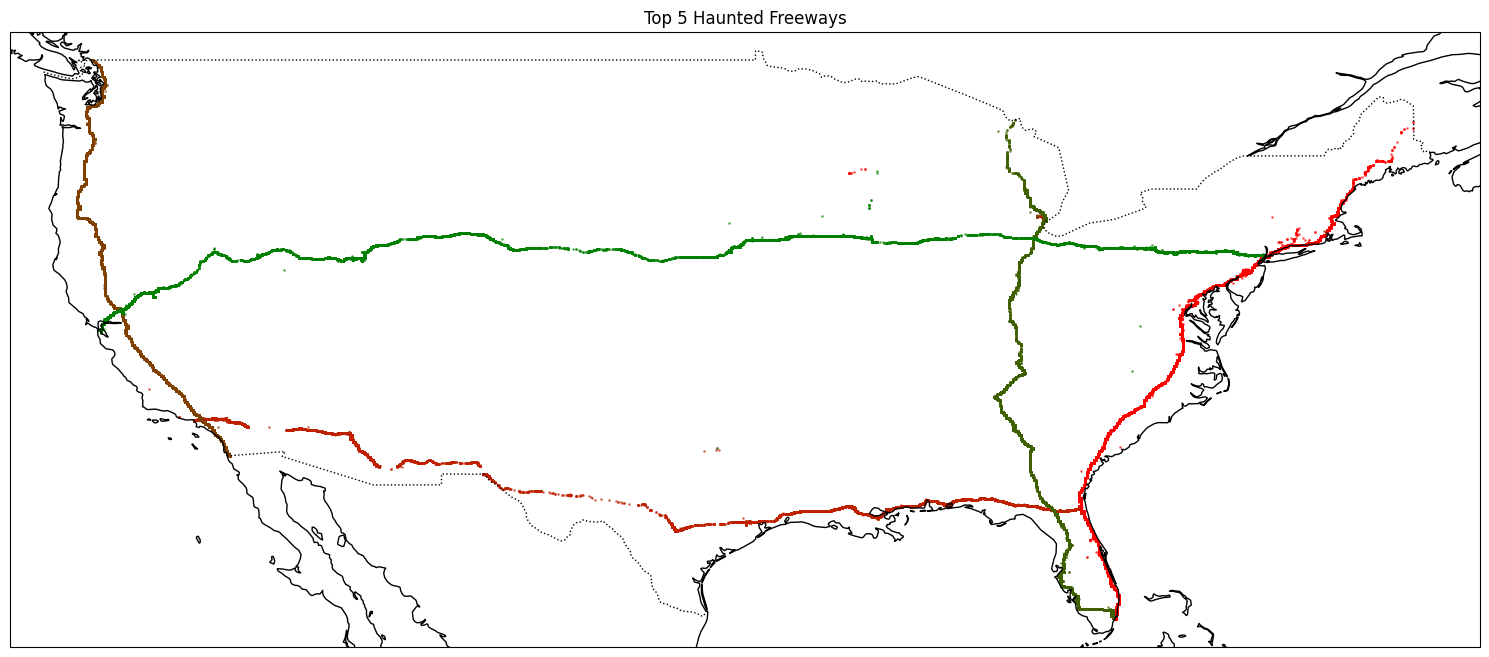

In [17]:
no_of_freeway_plots = 5

gfd_list = []
red_to_green = mcolors.LinearSegmentedColormap.from_list("RedGreen", ["red", "green"])
color_list = [red_to_green(i / (no_of_freeway_plots - 1)) for i in range(no_of_freeway_plots)]

for i in range(no_of_freeway_plots):
    assert i < 20
    df_temp = df_freeway[df_freeway['Freeway'] == sorted_counts.iloc[i, 0]]
    gfd = gpd.GeoDataFrame(df_temp, geometry=gpd.points_from_xy(df_temp['Start_Lng'], df_temp['Start_Lat']))
    gfd_list.append(gfd)

freeway_maps(gfd_list, color_list)

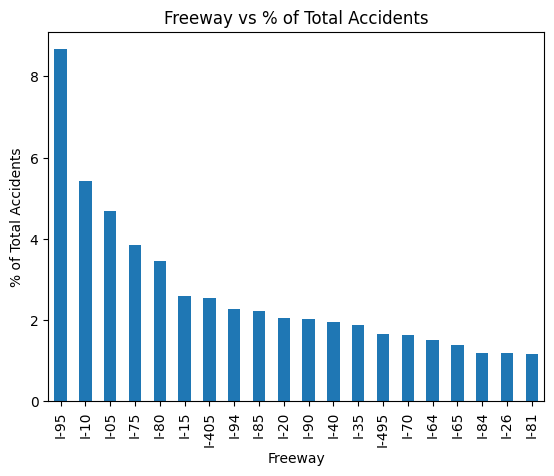

In [18]:
top_20_freeway = sorted_counts[:20]


top_20_freeway.plot(kind='bar', x='Freeway', y='Percentage', legend=False)

# Customize the plot
plt.title("Freeway vs % of Total Accidents")
plt.xlabel("Freeway")
plt.ylabel("% of Total Accidents")
plt.show()

In [19]:
def state_data(df):
    state_cols = ['Severity', 'State']
    df = df[state_cols]
    return df

df_state = state_data(df)

In [20]:
import plotly.express as px
severity_counts = df_state.groupby(['State', 'Severity']).size().reset_index(name='Counts')

# Group by State to get total accidents (for sorting purposes)
total_accidents = severity_counts.groupby('State')['Counts'].sum().reset_index()
total_accidents = total_accidents.sort_values(by='Counts', ascending=False)

# Merge severity_counts with total_accidents to ensure the same order
severity_counts = severity_counts.merge(total_accidents, on='State', suffixes=('', '_Total'))

# Sort severity_counts by the total accident counts for consistent ordering
severity_counts = severity_counts.sort_values(by='Counts_Total', ascending=False)

# Define Severity as a categorical variable to ensure color ordering
severity_order = severity_counts.groupby('Severity')['Counts'].sum().sort_values(ascending=False).index.tolist()
severity_counts['Severity'] = pd.Categorical(severity_counts['Severity'], categories=severity_order, ordered=True)

# Plot the original accident counts (Unnormalized)
fig = px.bar(
    severity_counts, 
    x='State', 
    y='Counts', 
    color='Severity', 
    title='Number of Accidents per Severity for Each State', 
    color_continuous_scale='Viridis'
)
fig.update_layout(xaxis_title='State', yaxis_title='Accident Count', xaxis_tickangle=-45)
fig.show()

In [21]:
state_population = {
    'AL': 5024279, 'AK': 733391, 'AZ': 7151502, 'AR': 3011524, 'CA': 39538223,
    'CO': 5773714, 'CT': 3605944, 'DE': 989948, 'FL': 21538187, 'GA': 10711908,
    'HI': 1455271, 'ID': 1839106, 'IL': 12812508, 'IN': 6785528, 'IA': 3190369,
    'KS': 2937880, 'KY': 4505836, 'LA': 4657757, 'ME': 1362359, 'MD': 6177224,
    'MA': 7029917, 'MI': 10077331, 'MN': 5706494, 'MS': 2961279, 'MO': 6154913,
    'MT': 1084225, 'NE': 1961504, 'NV': 3104614, 'NH': 1377529, 'NJ': 9288994,
    'NM': 2117522, 'NY': 20201249, 'NC': 10439388, 'ND': 779094, 'OH': 11799448,
    'OK': 3959353, 'OR': 4237256, 'PA': 13002700, 'RI': 1097379, 'SC': 5118425,
    'SD': 886667, 'TN': 6910840, 'TX': 29145505, 'UT': 3271616, 'VT': 643077,
    'VA': 8631393, 'WA': 7705281, 'WV': 1793716, 'WI': 5893718, 'WY': 576851,
    'DC': 689545
}

In [22]:
severity_counts['Population'] = severity_counts['State'].map(state_population)
severity_counts['Normalized_Count'] = (severity_counts['Counts_Total'] / severity_counts['Population']) * 100000

severity_counts[severity_counts['State'] == 'SC']

,State,Severity,Counts,Counts_Total,Population,Normalized_Count
151,SC,1,6175,382557,5118425,7474.115573
153,SC,3,42470,382557,5118425,7474.115573
154,SC,4,3095,382557,5118425,7474.115573
152,SC,2,330817,382557,5118425,7474.115573


In [27]:
import plotly.graph_objects as go

# Create the bar chart using Plotly Express
bar_fig = px.bar(
    severity_counts,
    x='State',
    y='Counts',
    color='Severity',
    title='Number of Accidents per Severity for Each State (Unnormalized)',
    color_continuous_scale='Viridis'
)

# Convert the Plotly Express figure to a go.Figure
fig = go.Figure(bar_fig)

# Add line graph
fig.add_trace(
    go.Scatter(
        x=severity_counts['State'],
        y=severity_counts['Normalized_Count'],
        mode='lines+markers',
        name='Total Counts Per Capita',
        line=dict(color='red', width=2),
        yaxis='y2'
    )
)

fig.update_layout(
    title="Statewise Accident Analysis",
    xaxis_title="State",
    yaxis_title="Counts (Accidents)",  # Left y-axis label for bar plot
    yaxis2=dict(
        title="Total Counts Per Capita",  # Right y-axis label for the line plot
        overlaying='y',  # This ensures the line plot uses a secondary y-axis
        side='right',  # Place secondary y-axis on the right
        showgrid=False  # Optionally remove grid lines from the secondary y-axis
    ),
    legend_title="Severity",
    legend=dict(
        orientation="h",  # Horizontal legend
        yanchor="bottom",  # Align legend at the bottom of the top boundary
        y=1.1,  # Position above the plot area
        xanchor="center",  # Center align the legend
        x=0.5  # Center the legend horizontally
    )
)
# Show the plot
fig.show()